In [15]:
## Import Simulation Function Library
from RetinaOptLib import *

In [30]:
## For saving/loading notebook state

#sessionTitle = "CellConvAnalysis_"+datetime.datetime.now().strftime("%m-%d-%y_%H-%M-%S")
#dill.dump_session((sessionTitle))

dill.load_session('ConvAnalysis_08-22-19_17-30-00')


In [1]:
# ## Simulation Functions
# def metricCompar(imgData,simParams,psychParams, electrode):
#     # Compare Error Metrics Side-by-Side for the same set of images    
    
#     imgSet = imgData.imgSet
#     xs     = imgData.xs
#     ys     = imgData.ys
    
#     if electrode:
#         print('Solving for Electrode Activities...')
#     else:
#         print('Solving for Cellular Activities...')    
    
#     print('MSE Activity Reconsruction:')
#     mseImgs, mseActs = reconsImgSet(imgSet,simParams, psychParams, "mse", electrode)
#     print('wMSE Activity Reconstruction')
#     wmsImgs, wmsActs = reconsImgSet(imgSet,simParams, psychParams, "wms", electrode)
#     print('SSIM Activity Reconstruction')
#     ssmImgs, ssmActs = reconsImgSet(imgSet,simParams, psychParams, "ssm", electrode)
    
#     print('Activities Solved. Rebuilding Images ...')
#     pixelDims = simParams["pixelDims"]
    
#     mseRecons = rebuildImg(img,mseImgs,xs,ys,pixelDims,psychParams)
#     wmsRecons = rebuildImg(img,wmsImgs,xs,ys,pixelDims,psychParams)
#     ssmRecons = rebuildImg(img,ssmImgs,xs,ys,pixelDims,psychParams)

#     print('Images rebuilt.')
#     print('Simulation Complete')
    
#     return (
#             mseImgs, wmsImgs, ssmImgs,
#             mseActs, wmsActs, ssmActs,
#             mseRecons, wmsRecons, ssmRecons
#            )

# def reconsImgSet(imgSet, simParams, psychParams, metric, electrode):
#     # Given a set of images (imgSet) as a 2d Matrix, and a metric, reconstruct
#     # the image set according to the given image in parallel according to the available cpu cores    
#     if electrode:
#         activityLength = simParams["P"].shape[1]
#     else:
#         activityLength = simParams["A"].shape[1]
    
#     numPixels = imgSet.shape[0]
#     numImgs   = imgSet.shape[1]
    
#     # convert imgSet to list for parallelization
#     imgList = []
#     for i in np.arange(numImgs):
#         imgList.append(imgSet[:,i])
     
#     num_cores = mp.cpu_count()
    
#     # run reconstructions in parallel
#     results = np.asarray(Parallel(n_jobs=num_cores)(delayed(actSolver)(i,simParams,psychParams,metric,electrode) for i in tqdm(imgList)))

#     #convert results back to 2 variables separating activity and the reconstructed image
#     imgs = np.zeros((numPixels,numImgs))
#     acts = np.zeros((activityLength,numImgs))
#     for i in np.arange(numImgs):
#         imgs[:,i] = results[i,0]
#         acts[:,i] = results[i,1]
#     return imgs, acts   
    
# def dct2(a):
#     # 2D Discrete Cosine Transform and Its Inverse
#     lDim = a.shape[0]
#     rDim = a.shape[1]
#     # build the matrix
#     n, k = np.ogrid[1:2*lDim+1:2, :lDim]
#     m, l = np.ogrid[1:2*rDim+1:2, :rDim]
#     Dl = 2 * np.cos(np.pi/(2*lDim) * n * k)
#     Dr = 2 * np.cos(np.pi/(2*rDim) * m * l)
#     return (Dl.T @ a @ Dr)

# def idct2(a):
#     return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

# def genStixel( height, width, s ):
# # % genStiheightelImg: Generate a zero-mean white-noise stixelated image of specified
# # % dimension.
# # %   This function generates an image of size specified bwidth (height,
# # %   width), and divides the image into s height s squares
# # %   each stiheightel having the same Gaussian Generated white noise value. 
# # %   The Gaussian values range from [-0.5, 0.5]. 


#     heightStixel = np.floor(height/s).astype(int)  #% full number of stixels
#     widthStixel = np.floor(width/s).astype(int)
#     remWidth = width - s*widthStixel #% remainder that specifies padding
#     remHeight = height - s*heightStixel

#     #% Depending whether there is remainder after full stixels, determine
#     #% if we need to pad. Otherwise, set pad variables to 0
#     if ( remWidth != 0): 
#         wpad = 1
#     else: 
#         wpad = 0

#     if (remHeight != 0):
#         hpad = 1
#     else: 
#         hpad = 0


#     # pad the image to fit to remainder size
#     img = np.zeros((height+remHeight,width+remWidth)) # %initialize image

#     #% Fill in the full stixel 
#     for i in np.arange(heightStixel+hpad+1):   # For each stixel block
#         for j in np.arange(widthStixel+wpad+1):
#             #% Generate a Gaussian White Noise value between [-0.5,0.5]
#             val = np.random.normal(0,1)
#             # Assign Block the Gaussian Value
#             img[(i-1)*s:i*s,(j-1)*s:j*s] = val


#     # clip image to original dimensions
#     img = img[0:height,0:width]
#     #normalize img to lie on interval [-0.5,0.5]
#     if (np.max(img)) != 0:
#         img = img / (2*np.max(img))
#         img[img > 0] = .5
#         img[img <= 0 ] = -.5
#     return img

# def flatDCT(pixelDims):
#     # build and return a flattened dct matrix specifically for (80,40) images flattened with fortran ordering
#     # Build 80 x 40 2D DCT-II Matrix
#     numPixels = pixelDims[0]*pixelDims[1]
#     D1 = np.zeros((numPixels,numPixels))
#     D2 = np.zeros((numPixels,numPixels))
#     # build a flattened form of a  1d DCT matrix 
#     lDim = pixelDims[0]
#     rDim = pixelDims[1]
#     n, k = np.ogrid[1:2*lDim+1:2, :lDim]
#     m, l = np.ogrid[1:2*rDim+1:2, :rDim]
#     Dl = 2 * np.cos(np.pi/(2*lDim) * n * k)
#     Dr = 2 * np.cos(np.pi/(2*rDim) * m * l)

# #     imRows = 80
# #     imCols = 40
#     # build D1
#     for i in np.arange(lDim):
#         for j in np.arange(rDim):
#             D1[j*lDim + i,j*lDim:(j+1)*lDim] = Dl.T[i,:]


#     # build D2
#     for i in np.arange(rDim):
#         for k in np.arange(lDim):
#             for j in np.arange(rDim):
#                 D2[k+j*pixelDims[0],i*pixelDims[0]+k] = Dr[i,j]
#     D = D2@D1
#     return D

# def flatW(psychParams,pixelDims): 
#     # build and return a flattned W matrix for images (img) flattned with fortran ordering
#     Wp = csf(psychParams,pixelDims)
#     flatW = np.reshape(Wp,(pixelDims[0]*pixelDims[1],),order='F')
#     W = np.diag(flatW)
#     return W

# def csf(psychParams,pixelDims):
#     # given a peak sensitivity frequency pf, and a psychophysically determined pixels-per-degree of viusal field ppd,
#     # and and image, return a mask that has the same shape as the image and applies a weighting to each pixel in the image
#     # according to the contrast sensitivity function 
#     def getNg(psychParams):
#         e = psychParams["e"]
#         Ng0 = psychParams["Ng0"]
#         eg = psychParams["eg"]
#         term1 = .85 / (1 + (e/.45)**2)
#         term2 = .15 / (1 + (3/eg)**2)
#         return Ng0*term1*term2
    
#     def Mopt(f,psychParams):
#         #given a spatial frequency f and psychophysical parameters,
#         # return the frequnecy filetered by the optical transfer function
#         # of the retina
#         sigma00 = .30           # Non-retinal optical linespread constant (arcmin)
#         sigmaRet = 1 / np.sqrt(7.2*np.sqrt(3)*getNg(psychParams))
#         sigma_0 = np.sqrt(sigma00**2 + sigmaRet**2) # (arcmin) std deviation of linespread (function of eccentricity)
#         Cab = .08    # (arcmin / mm ) dimensionality constant
#         d = psychParams["d"] # pupil size in mm
#         sigma = np.sqrt(sigma_0**2 + (Cab*d)**2)
#         return np.exp(-2*(np.pi**2)*((sigma/60)**2)*(f**2))
        
#     def intTerm(f,psychParams):
#         # given spatial frequency f and psychophysical paratmeters,
#         # calculate the visual-angle integration term of the CSF
#         e = psychParams["e"]
#         Xmax = 12   # (degrees) maximum visual integration area  
#         term1 = .85 / (1 + (e/4)**2)
#         term2 = .15 / (1 + (e/12)**2)
#         Xmax=Xmax*(term1+term2)**-.5
#         Ymax = Xmax
#         Nmax = 15  # (cycles) maximum number of cycles function of eccentriicty
#         XO = psychParams["XO"]
#         YO = psychParams["YO"]
        
#         term1 = (.5*XO)**2 + 4*e**2
#         term2 = (.5*XO)**2 + e**2
#         NmaxFac = term1/term2
        
#         return 1/(XO*YO) + 1/(Xmax*Ymax) + NmaxFac*(f/Nmax)**2
    
#     def illumTerm(psychParams):
#         #given spatial frequency f and psychophysical parameters,
#         # calculate the  illumance term of the CSF
#         n = .03  #quantum efficiency term (function of eccentricity)
#         e = psychParams["e"]
#         term1 = .4 / (1 + (e/7)**2)
#         term2 = .48 / (1 + (e/20)**2) 
#         n = n*(term1 + term2 +.12)
#         p = 1.24 # photon conversion factor (function of incident light)
#         d = psychParams["d"]
#         L = psychParams["L"]
#         E = np.pi/4 * d**2 * L * (1 - (d/9.7)**2 + (d/12.4)**4)
#         return 1/(n*p*E)
        
#     def inhibTerm(f,psychParams):
#         # given spatial frequency f and psychophysical parameters,
#         # calculate the lateral inhibition term of the CSF
#         Ng0 = psychParams["Ng0"]
#         e = psychParams["e"]
#         u0 = 7  #(cycles/deg) stop frequency of lateral inhibition
#         term1 = .85 / (1 + (e/4)**2)
#         term2 = .13 / (1 + (e/20)**2)
#         u0 = u0 * (getNg(psychParams)/Ng0)**.5 * (term1 + term2 + .02)**-.5
#         return 1 - np.exp(-(f/u0)**2)
    
        
#     k  = psychParams["k"]
#     X0 = psychParams["elecXO"]
#     Y0 = psychParams["elecYO"]
#     T  = psychParams["T"]
#     Ng = getNg(psychParams)
#     Ng0 = psychParams["Ng0"]
#     ph0= 3*10**-8*Ng0/Ng  # neural noise term (sec / deg^2)
#     sfRes = 1/pixelDims[0] #spatial frequency resolution is set by the number of horizontal pixels in the image 
#     fxx,fyy = np.meshgrid(np.arange(pixelDims[1]),np.arange(pixelDims[0]))
#     ppd = pixelDims[0]/X0
#     fs = (sfRes * ppd *(fxx**2+fyy**2)**.5  )
    

#     num   = Mopt(fs,psychParams) / k
    
#     if not psychParams["binocular"]:
#         num = num /  np.sqrt(2)
    
#     denom = np.sqrt( 
#         (2/T)
#         *intTerm(fs,psychParams)
#         *(illumTerm(psychParams) + ph0 / inhibTerm(fs,psychParams)) 
#     )
#     W = np.divide(num,denom)
#     return W

# def pruneDict(P,eActs,threshold=.01):
#     # Given a dictionary and a threshol value, remove any dictionary elements whose maximum value is 
#     # below the threshold.  Append an element of zeros to the pruned dictionary. 
#     pp = P.copy()
#     pp[pp <= threshold] = 0
    
#     dictLength = pp.shape[1]
#     toDel = []
#     for i in  np.arange(dictLength):
#         if ~np.any(pp[:,i]):
#             toDel.append(i)
    
    
#     pp = np.delete(pp,toDel,axis=1)
#     eActs = np.delete(eActs,toDel,axis=0)
    
#     return np.hstack((pp,np.zeros((pp.shape[0],1)))),  np.vstack((eActs,np.asarray(np.zeros((1,eActs.shape[1])))))
    
# def mse(A,B):
#     return np.linalg.norm(A-B)**2 / A.size

# def jpge(A,B,psychParams,pixelDims):
#     jpge.D = flatDCT(pixelDims)
#     diffImg = A - B
#     if diffImg.ndim is not 1: #flatten image if not already flattened
#         diffImg = diffImg.flatten
#     W = flatW(psychParams, pixelDims)
#     W = W/np.max(W)

#     return np.linalg.norm(W@jpge.D@diffImg)**2 / A.size

# def SSIM(X, Y, K1=.01, K2=.03, alpha=1, beta=1, gamma=1, L=1 ):
#     # Given two images A & B of the same size, calculate & Return Their Structural Similarity Index
#     # Parameters: A,B: two MN x 1 flattened images
#     #             K1,K2: Stability Constants (retried from Wang SSIM Paper)
#     #             alpha, beta, gamma: relative powers of luminance, contrast, and structural functions respectivtely
#     #             L: dynamic range of pixel intensities
    
#     if X.ndim is not 1:
#         X = X.flatten
#         Y = Y.flatten
    
#     C1 = (K1*L)**2
#     C2 = (K2*L)**2
#     C3 = C2/2 #by default from Wang Paper
#     numPixels = X.shape[0]
#     meanX = np.mean(X)
#     meanY = np.mean(Y)
#     lum = (2*meanX*meanY + C1) / (meanX**2 + meanY**2 + C1)

#     stdX = np.std(X)
#     stdY = np.std(Y)

#     con = ( 2*stdX*stdY + C2) / (stdX**2 + stdY**2 + C2)
#     stdXY = (1 / (numPixels-1)) * np.sum( np.multiply((X-meanX),(Y - meanY)) ) 

#     srt   = (stdXY + C3) / (stdX*stdY + C3)
#     ssim = lum**alpha * con**beta * srt**gamma
#     return ssim

# def getElecAngs(smps,stixelSize, eyeDiam, pixelDims):
#     # Given a set of psychophysical parameters,the reconstructing electrode array
#     # smps: stimulus monitor pixel size: the size of a single monitor pixel in lab setup on the retina (microns)
#     # stixelSize:  the stixel size,which is the square root of the number of monitor pixels grouped together 
#     #      to form a single STA pixel (one STA pixel is stixelSize x stixelSize monitor pixels)
#     # eyeDiam: the Emmetropia diameter of the eye in milimeters
        
    
#     retArea  = ( # Retinal area in milimeters
#         pixelDims[0]*smps*stixelSize/1000,
#         pixelDims[1]*smps*stixelSize/1000
#     )
    
#     elecVisAng = ( # Visual Angle Spanned by the Electrode Reconstruction 
#         np.rad2deg(np.arctan(retArea[0]/eyeDiam)),
#         np.rad2deg(np.arctan(retArea[1]/eyeDiam))
#     )
    
#     return elecVisAng

# def preProcessImage(img,psychParams,simParams):
#     # Given psychophysically determined viewing angles for the visual
#     # scene, the image, and the dimensions of the stimulus reconstruction in 
#     # pixels, tile the image into a set of subimages, where each subimage
#     # covers precisely elecVisAng[0] x elecVisAng[1] degrees of the visual
#     # scene. Resample these tiled images to have the same dimensions as the 
#     # stimulus pixel (pixelDims) for reconstruction.
#     # elecVisAng[0]/objVisAngle[0] = selection/  img.shape[0]
    
#     def tileImage(img,pixelDims):
#         # Given an mxn image and pixelDims, tile the image by splitting it into 
#         # numImgs subimages obtained by taking pieces of size pixelDims from the original image, stacking,
#         # and then returning the images, as well as the x & y locations of the top left corner of each image
        
#         def fitToDims(img,pixelDims):
#             # Given an mxn image, fit the image to the given dimension by padding it with zeros. 
#             # This imamge assumes m<= pixelDIms[0] and/or n <= pxielDims[1]
#             fitImg = np.zeros(pixelDims)
#             fitImg[0:img.shape[0],0:img.shape[1]] = img
#             return fitImg       
        
#         print('Tiling Image ...')
#         x = 0
#         y = 0 # initial location is top left of image
#         subImgs = np.zeros((pixelDims[0]*pixelDims[1],0))
#         xs = np.asarray([])
#         ys = np.asarray([])

#         while y <= img.shape[1]-pixelDims[1]:
#             # sweep horizontally. if x >= img.shape set x to 0 and update y
#             if x >= img.shape[0]-pixelDims[0]: 
#                 x = 0
#                 y += int(pixelDims[0])

#             selection = fitToDims(img[x:x+pixelDims[0],y:y+pixelDims[1]],pixelDims)
#             selection = np.reshape(selection,(pixelDims[0]*pixelDims[1],1),order='F')
#             if not np.all(selection==0):
#                 subImgs = np.concatenate((subImgs,selection),1)
#                 xs = np.append(xs,[x])
#                 ys = np.append(ys,[y])
#                 x += int(pixelDims[0])

#         print('Tiled Image')        
#         return subImgs, xs, ys

#     pixelDims = simParams["pixelDims"]
    
#     selecDims = getSelectionDims(psychParams)

#     imgSet,x,y = tileImage(img,selecDims)

#     numImg = imgSet.shape[1]
#     resImgSet = np.zeros((pixelDims[0]*pixelDims[1],numImg))

#     # go through each image, resample it and store it in resImgSet
#     for i in np.arange(numImg):
#         resImgSet[:,i],zoomF = resample(imgSet[:,i],selecDims,pixelDims)
    
#     class imgData:
#         numImgs = numImg
#         imgSet = resImgSet
#         xs = x
#         ys = y
#         zoomFac = zoomF
#     return imgData

# def getSelectionDims(psychParams):
#     XO = psychParams['XO']
#     elecXO = psychParams['elecXO']
#     elecYO = psychParams['elecYO']
#     selectionSize = int(np.ceil(elecXO/XO * img.shape[1]))

#     # select the equivalent of elecVisangx elecVisAng pixels from the image
#     selecDims = (selectionSize,selectionSize)
#     return selecDims

# def actSolver(img,simParams,psychParams,mode,electrode):
#     # Reconstruct an image according to the error metric specified by "mode"
#     # Input: img : the image to be reconstructed, dims = psychParams["pixelDims"]
#     #        simParams : a simulation parameters dictionary 
#     #        psychParams: a psychophysical parameters dictionary
#     #        mode : a string specifying the particular error metric being used
#     #        electrode : a boolean specifying whether to reconstruct according ot optimal cell 
#                 # activities or using th electrode stimulation dictionary 
#     #Subfunctions:
#     def varTerm(simParams,Phi, x):
#     # Return the cost function associate with the variance component of the reconstruction
#     # error. Only used in the case that electrode is true
#     # Inputs: 
#     #     simParams: the simulatin parameters dictionary object
#     #     electrode: boolean indicating whether performing optimal cellular or electrode dictionary recons
#     #     x : the cvx variable representing the activity vector object that is being solved for

#         P = simParams["P"]
#         A = simParams["A"]
#         V = np.zeros(P.shape)
#         for j in np.arange(P.shape[1]):
#             V[:,j] = np.multiply(P[:,j],(1-P[:,j]))
#         varMtx = np.multiply(Phi,Phi)@V
#         return  cp.sum(varMtx@x)
    
#     def reconsSSM(img, simParams, electrode, epsilon = 10**-3):
#         # use bisection search to solve for an optimal-SSIM reconstruction

#         def findFeasible(y,alpha,simParams, electrode ):
#             # Return a feasible solution to the SSIM optimization problem
#             # Using cvxpy solves the constrained feasability problem that is a transformation of the SSIM
#             # optimization problem.

#             def cvxineq(a,y,x,Phi):
#                 # a convex inequality to evaluate feasability
#                 return (1-a)*cp.sum_squares(y-Phi@x)-2*a*(Phi@x).T@y

#             A = simParams["A"]
#             P = simParams["P"]

#             if electrode:
#                 x = cp.Variable(P.shape[1],integer=True)
#                 cost = varTerm(simParams, A , x)
#                 Phi = A@P
#             else:
#                 x = cp.Variable(A.shape[1],integer=True)
#                 cost = 1
#                 Phi = A

#             T = simParams["numStims"]
#             N = simParams["maxAct"]
#             if T == -1:
#                 constraints = [x <= N, x >= 0, cvxineq(alpha,y,x,Phi) <= 0]
#             else:
#                 constraints = [x <= N, x >= 0, cvxineq(alpha,y,x,Phi) <= 0, cp.sum(x) <= T]

#             prob= cp.Problem(cp.Minimize(cost),constraints)
#             try:
#                 prob.solve(solver=cp.GUROBI)
#             except: 
#                 prob.solve(solver=cp.SCS)

#             if x.value is not None:
#                 return True, x.value
#             else:
#                 return False, x.value

#         A = simParams["A"]
#         P = simParams["P"]
#         if electrode:
#             actLength = P.shape[1]
#         else:
#             actLength = A.shape[1]


#         # image preprocessing
#         imgCopy = copy.deepcopy(img)
#         mu = np.mean(imgCopy)
#         imgCopy -= mu 
#         y = imgCopy  


#         # bisection initialization
#         l = 0 # lower bound
#         u = 2 # upper bound
#         e = epsilon  # accuracy
#         x = np.zeros(actLength) # solution
#         xCurr = np.zeros(actLength) # temporary solution

#         # bisection search
#         while u - l > e:
#             alpha = (l+u)/2
#             # find feasible x   let u = alpha
#             isFeasible, xCurr = findFeasible(y, alpha, simParams, electrode)


#             if isFeasible:
#                 u = alpha
#             elif alpha == 1:
#                 print('SSIM reconstruction cannot be solved.')
#                 if electrode:
#                     return 0*A@P@x, 0*x
#                 else:
#                     return 0*A@x, 0*x
#             else:
#                 l = alpha

#             if xCurr is not None: # only overwrite x is new value is generated
#                 x = copy.deepcopy(xCurr)            

#         if electrode:
#             return A@P@x+mu, x
#         else:
#             return A@x+mu, x
    
    
#     A = simParams["A"]
#     P = simParams["P"]
#     T = simParams["numStims"]
#     N = simParams["maxAct"]
#     mu = np.mean(img)
#     imgCopy = copy.deepcopy(img)
#     imgCopy -= mu 
#     y = imgCopy

#     if electrode:
#         x = cp.Variable(P.shape[1])
#         C = np.identity(P.shape[1])*-1
#         d = np.zeros((P.shape[1],))
#     else:
#         x = cp.Variable(A.shape[1])
#         C = np.identity(A.shape[1])*-1
#         d = np.zeros((A.shape[1],))

#     if mode == "mse": 
#         if electrode:
#             cost = cp.sum_squares(y-A@P@x) + varTerm(simParams,A,x)
#         else:
#             cost = cp.sum_squares(y-A@x)
    
#     elif mode == "wms":
#         W = flatW(psychParams,simParams["pixelDims"])
#         D = flatDCT(pixelDims)
#         if electrode:
#             cost = cp.sum_squares(W@D@(y-A@P@x)) + varTerm(simParams, W@D@A, x)
#         else:
#             try:
#                 cost = cp.sum_squares(W@D@(y-A@x))
#             except:
#                 print(W.shape)
#                 print(D.shape)
#                 print(y.shape)
#                 print(x.shape)
#                 print(A.shape)
            
#     elif mode == "ssm": 
#         # custom SSIM bisection search solver
#         return reconsSSM(img, simParams, electrode)
        
#     # Solve cost function and return x's value and the reconstructed image
#     if T == -1:
#         prob= cp.Problem(cp.Minimize(cost),[x<=N,C@x >= d])
#     else:
#         prob = cp.Problem(cp.Minimize(cost),[x<=N, x >= d, cp.sum(x) <= T])
        
#     try:
#         prob.solve(solver=cp.GUROBI)
#     except:
#         prob.solve()
    
#     if electrode:
#         return A@P@x.value+mu, x.value
#     else:
#         try:
#             return A@x.value+mu, x.value
#         except:
#                 print(W.shape)
#                 print(D.shape)
#                 print(y.shape)
#                 print(x.shape)
#                 print(A.shape)
#                 return
    
# def numStimSweep(imgData,simParams,psychParams,electrode):
#     # Given a set of images, reconstruct each image using all metric and sweep over the number of allowable stimulations.
#     # run a metric comparison simulation over a specified number of stimulation times
    
#     Tres = 16
#     Ts   = np.logspace(0,5,Tres)
    
#     mseImgSets = []
#     wmsImgSets = []
#     ssmImgSets = []
    
#     mseActSets = []
#     wmsActSets = []
#     ssmActSets = []
    
#     mseRecSets = []
#     wmsRecSets = []
#     ssmRecSets = []
    
#     for Tidx, T in enumerate(Ts):
#         print("T: %i;  %i/%i"%(T, Tidx+1, Ts.size))
#         simParams["numStims"] = T
#         (
#       mseImgs, wmsImgs, ssmImgs,
#       mseActs, wmsActs, ssmActs,
#       mseRecons, wmsRecons, ssmRecons
#     )  =  metricCompar(imgData,simParams,psychParams, electrode)
        
#         mseImgSets.append(mseImgs)
#         wmsImgSets.append(wmsImgs)
#         ssmImgSets.append(ssmImgs)

#         mseActSets.append(mseActs)
#         wmsActSets.append(wmsActs)
#         ssmActSets.append(ssmActs)

#         mseRecSets.append(mseRecons)
#         wmsRecSets.append(wmsRecons)
#         ssmRecSets.append(ssmRecons)
        
#     class stimSweepData:
#         Ts        = np.logspace(0,5,Tres)
#         mseImgSet = np.asarray(mseImgSets)
#         wmsImgSet = np.asarray(wmsImgSets)
#         ssmImgSet = np.asarray(ssmImgSets)
        
#         mseActSet = np.asarray(mseActSets)
#         wmsActSet = np.asarray(wmsActSets)
#         ssmActSet = np.asarray(ssmActSets)
        
#         mseRecSet = np.asarray(mseRecSets)
#         wmsRecSet = np.asarray(wmsRecSets)
#         ssmRecSet = np.asarray(ssmRecSets)
        
#     return stimSweepData

# def resample(img,currDims,desiredDims):
#     # given a (currDims[0]*currDims[1] x 1 ) image vector, resample the image
#     # to fit to desired dims and return this image flatted into a 
#     #(desiredDims[0],desiredDims[1] x 1) image vector
#     currImg = np.reshape(img,currDims,order='F')

#     # desiredDims[0] = zoomFac * currDims[0]
#     zoomFac =  desiredDims[0]/currDims[0]
#     zImg = ndimage.zoom(currImg,zoomFac)
#     return np.reshape(zImg,(desiredDims[0]*desiredDims[1],),order='F'),zoomFac

In [2]:
# ## Visulization Functions
# %matplotlib notebook

# def dispImgSetCorr(eLocs,eMap,imgs,mseActs,jpgActs, ssmActs):
#     # given a set of images, electrode locations, and their dictionary reconstructions,
#     # calculate correlations (if any) of electrode activity across the set of images 
#     numImages = imgs.shape[1]

# #     mseCurr = np.zeros((numImages,))
# #     jpgCurr = np.zeros((numImages,))
# #     ssmCurr = np.zeros((numImages,))
# #     for i in np.arange(numImages):
# #         mseCurr[i] = np.dot(mseActs[:,imgNum],eMap[:,1])
# #         jpgCurr[i] = np.dot(jpgActs[:,imgNum],eMap[:,1])
# #         ssmCurr[i] = np.dot(ssmActs[:,imgNum],eMap[:,1])
    
# #     mseActs = np.vstack((mseActs,mseCurr))
# #     jpgActs = np.vstack((jpgActs,jpgCurr))
# #     ssmActs = np.vstack((ssmActs,ssmCurr))

# #     print('Average Current for MSE Images: %i nC' % np.mean(mseCurr))
# #     print('Average Current for CSF Images: %i nC' % np.mean(jpgCurr))
# #     print('Average Current for SSIM Images: %i nC' % np.mean(ssmCurr))

#     data = np.hstack((mseActs,jpgActs,ssmActs))
#     covdata = np.cov(data) # covariance matrix
#     wdata,vdata = np.linalg.eig(covdata) # eigen decomposition of covariance matrix

#     # project each activity vector onto the 3 respective components
#     (data1,data2,data3) = projectPC(data,vdata[:,0],vdata[:,1],vdata[:,2])

#     # generate set of random data restricted to be positive within the range o
#     dataMax = np.max(data)
#     randData = np.random.randint(0,dataMax,size=data.shape)
#     (rand1,rand2,rand3) = projectPC(randData,vdata[:,0],vdata[:,1],vdata[:,2])

#     markerSize = 1

#     # 3D Scatter Plot of Image Data Projected onto principal Axes
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(data1[0:numImages-1],data2[0:numImages-1],data3[0:numImages-1],label='MSE',s=markerSize)
#     ax.scatter(data1[numImages:2*numImages-1],data2[numImages:2*numImages-1],data3[numImages:2*numImages-1],label='JPG',s=markerSize)
#     ax.scatter(data1[2*numImages:],data2[2*numImages:],data3[2*numImages:],c='red',label='SSIM',s=markerSize)
#     ax.set_xlabel('Principal Component 1')
#     ax.set_ylabel('Principal Component 2')
#     ax.set_zlabel('Principal Component 3')
#     plt.legend(loc='upper right')
#     plt.show()
    
#     xLims = 2
#     yLims = 1

#     # 2D Plot Projected Onto Principal Axes
#     plt.figure()
#     plt.scatter(data1[0:numImages-1],data2[0:numImages-1],s=markerSize,label='MSE')
#     plt.scatter(data1[numImages:2*numImages-1],data2[numImages:2*numImages-1],s=markerSize,label='JPG')
#     plt.scatter(data1[2*numImages:],data2[2*numImages:],c='red',label='SSIM',s=markerSize)
#     plt.title('PC1 & PC2')
#     plt.legend()
#     plt.xlim([-xLims,xLims])
#     plt.ylim([-yLims,yLims])
#     plt.savefig('PC1PC2Electrode.jpg',bbox_inches='tight')
#     plt.show()


#     plt.figure()
#     plt.scatter(data1[0:numImages-1],data3[0:numImages-1],s=markerSize,label='MSE')
#     plt.scatter(data1[numImages:2*numImages-1],data3[numImages:2*numImages-1],s=markerSize,label='JPG')
#     plt.scatter(data1[2*numImages:],data3[2*numImages:],c='red',label='SSIM',s=markerSize)
#     plt.title('PC1 & PC3')
#     plt.legend()
#     plt.xlim([-xLims,xLims])
#     plt.ylim([-yLims,yLims])
#     plt.savefig('PC1PC3Electrode.jpg',bbox_inches='tight')
#     plt.show()

#     plt.figure()
#     plt.scatter(data2[0:numImages-1],data3[0:numImages-1],s=markerSize,label='MSE')
#     plt.scatter(data2[numImages:2*numImages-1],data3[numImages:2*numImages-1],s=markerSize,label='JPG')
#     plt.scatter(data2[2*numImages:],data3[2*numImages:],c='red',label='SSIM',s=markerSize)
#     plt.xlim([-xLims,xLims])
#     plt.ylim([-yLims,yLims])
#     plt.title('PC2 & PC3')
#     plt.legend()
#     plt.savefig('PC2PC3Electrode.jpg',bbox_inches='tight')
#     plt.show()


# ## also plot centroids in pca space
# #     dataVecs = np.vstack((data1,data2,data3))
# #     mseCentroid = np.sum(dataVecs[:,0:numImages-1],1)/numImages
# #     sfeCentroid = np.sum(dataVecs[:,numImages:2*numImages-1],1)/numImages
# #     jpgCentroid = np.sum(dataVecs[:,2*numImages:],1)/numImages

# #     mseCentroidAct = np.real(mseCentroid[0]*vdata[:,0] + mseCentroid[1]*vdata[:,1] + mseCentroid[2]*vdata[:,2])
# #     sfeCentroidAct = np.real(sfeCentroid[0]*vdata[:,0] + sfeCentroid[1]*vdata[:,1] + sfeCentroid[2]*vdata[:,2])
# #     jpgCentroidAct = np.real(jpgCentroid[0]*vdata[:,0] + jpgCentroid[1]*vdata[:,1] + jpgCentroid[2]*vdata[:,2])


# #     print(vdata.shape)
# #     mseCentImg = np.reshape(np.expand_dims(A@P@mseCentroidAct,axis=1),(80,40),order='F')
# #     sfeCentImg = np.reshape(np.expand_dims(A@P@sfeCentroidAct,axis=1),(80,40),order='F')
# #     jpgCentImg = np.reshape(np.expand_dims(A@P@jpgCentroidAct,axis=1),(80,40),order='F')

# #     print(mseCentImg)
# #     maxval = .0001
# #     minval = -maxval

# #     plt.figure(figsize=(10,10))
# #     plt.subplot(131)
# #     plt.title('MSE PC Centroid')
# #     plt.imshow(mseCentImg,cmap='bone',vmin=minval,vmax=maxval)
# #     plt.axis('off')
# #     plt.subplot(132)
# #     plt.title('SFE PC Centroid')
# #     plt.imshow(sfeCentImg,cmap='bone',vmin=minval,vmax=maxval)
# #     plt.axis('off')
# #     plt.subplot(133)
# #     plt.title('JPG PC Centroid')
# #     plt.imshow(jpgCentImg,cmap='bone',vmin=minval,vmax=maxval)
# #     plt.axis('off')
# #     plt.savefig('centComparCell.jpg',bbox_inches='tight')
# #     plt.show()


# #     plt.figure(figsize=(10,10))
# #     plt.imshow(np.abs(mseCentImg-jpgCentImg)/maxval,cmap='bone',vmin=0,vmax=1)
# #     plt.axis('off')
# #     plt.title('|MSE - JPG|/max(MSE) PC Centroid')
# #     plt.colorbar()
# #     plt.savefig('mseJpgCentComparCell.jpg',bbox_inches='tight')
# #     plt.show()


#     return wdata,vdata

# def projectPC(data,pc1,pc2,pc3):
#     #given a dataDim x numPts matrix of data, and 3 dataDim principal component vectors,
#     #return a numPts vector containing the scalar projection of the data onto the vector at each numpt

#     dataDim = data.shape[0]
#     numPts = data.shape[1]
#     proj1 = np.zeros((numPts,))
#     proj2 = np.zeros((numPts,))
#     proj3 = np.zeros((numPts,))

#     for i in np.arange(numPts):
#         dataNorm = np.sum(np.multiply(data[:,i],data[:,i]))
#         proj1[i] = np.dot(data[:,i],pc1)/(np.linalg.norm(pc1)*np.linalg.norm(data[:,i]))
#         proj2[i] = np.dot(data[:,i],pc2)/(np.linalg.norm(pc2)*np.linalg.norm(data[:,i]))
#         proj3[i] = np.dot(data[:,i],pc3)/(np.linalg.norm(pc3)*np.linalg.norm(data[:,i]))
#     return (proj1,proj2,proj3)

# def eActStats(eLocs,eActs,xmse,xsfe,xjpg):
#     # electrical center of mass
#     mseAct, sfeAct, jpgAct = getElecAct(eActs,xmse,xsfe,xjpg)
#     numElectrodes = mseAct.size

#     #Means
#     mseMean = np.sum(mseAct)/numElectrodes
#     sfeMean = np.sum(sfeAct)/numElectrodes
#     jpgMean = np.sum(jpgAct)/numElectrodes

#    ## Centers of Mass
#     print('Centers of Mass:')
#     mseCOM = np.zeros((2,))
#     sfeCOM = np.zeros((2,))
#     jpgCOM = np.zeros((2,))
#     for i in np.arange(numElectrodes):
#         mseCOM += np.asarray([eLocs[i,0],eLocs[i,1]])*mseAct[i]/(mseMean*numElectrodes)
#         sfeCOM += np.asarray([eLocs[i,0],eLocs[i,1]])*sfeAct[i]/(sfeMean*numElectrodes)
#         jpgCOM += np.asarray([eLocs[i,0],eLocs[i,1]])*jpgAct[i]/(jpgMean*numElectrodes)


#    ## ECOM spread
#     mseSpread = np.zeros((2,))
#     sfeSpread = np.zeros((2,))
#     jpgSpread = np.zeros((2,))

#     for i in np.arange(numElectrodes):
#         mseSpread += ( mseAct[i]/(mseMean*numElectrodes)*(np.asarray([eLocs[i,0],eLocs[i,1]]) - mseCOM))**2
#         sfeSpread += ( sfeAct[i]/(sfeMean*numElectrodes)*(np.asarray([eLocs[i,0],eLocs[i,1]]) - sfeCOM))**2
#         jpgSpread += ( jpgAct[i]/(jpgMean*numElectrodes)*(np.asarray([eLocs[i,0],eLocs[i,1]]) - jpgCOM))**2

#     mseSpread = np.sqrt(mseSpread)/(numElectrodes - 1)
#     jpgSpread = np.sqrt(jpgSpread)/(numElectrodes - 1)
#     sfeSpread = np.sqrt(sfeSpread)/(numElectrodes - 1)

#     plt.show()

#     plt.figure(figsize=(10,10))
#     scale = .05
#     plt.subplot(2,1,1)
#     plt.scatter(eLocs[:,0],eLocs[:,1])
#     plt.scatter(mseCOM[0],mseCOM[1],s=scale*np.sum(mseAct),label='MSE (Avg Activity = %i stimulations/electrode)'%mseMean)
#     #plt.errorbar(mseCOM[0],mseCOM[1], xerr=mseSpread[0],yerr=mseSpread[1], fmt='o',label='MSE (Avg Activity = %i stimulations/electrode)'%mseMean)
#     plt.scatter(sfeCOM[0],sfeCOM[1],s=scale*np.sum(sfeAct),label='SFE (Avg Activity = %i stimulations/electrode)'%sfeMean)
#     #plt.errorbar(sfeCOM[0],sfeCOM[1], xerr=sfeSpread[0],yerr=sfeSpread[1],fmt='o',label='SFE (Avg Activity = %i stimulations/electrode)'%sfeMean)
#     plt.scatter(jpgCOM[0],jpgCOM[1],s=scale*np.sum(jpgAct),label='JPG (Avg Activity = %i stimulations/electrode)'%jpgMean)
#     #plt.errorbar(jpgCOM[0],jpgCOM[1], xerr=jpgSpread[0],yerr=jpgSpread[1],fmt='o',label='JPG (Avg Activity = %i stimulations/electrode)'%jpgMean)

#     plt.legend(loc='upper right')
#     plt.subplot(2,1,2)
#     scale = 1
#     plt.scatter(eLocs[:,0],eLocs[:,1],s=scale*sfeAct,label='SFE max = %i' %np.max(sfeAct),alpha=.7)
#     plt.scatter(eLocs[:,0],eLocs[:,1],s=scale*jpgAct,label='JPG max = %i' %np.max(jpgAct),alpha=.7)
#     plt.scatter(eLocs[:,0],eLocs[:,1],s=scale*mseAct,label='MSE max = %i' %np.max(mseAct),alpha=.7)
#     plt.scatter(eLocs[:,0],eLocs[:,1],c='grey')
#     plt.title('Average Electrode Activity for Mosaic Reconstruction')
#     plt.xlabel('Horizontal Location (um)',fontsize=20)
#     plt.ylabel('Vertical Location (um)',fontsize=20)
#     plt.legend(loc='upper right')
#     plt.show()

#     # ## coactivity maps not much interesting
#     # mseAct, sfeAct, jpgAct = getElecAct(eActs,xmses[:,imgNum],xsfes[:,imgNum],xjpgs[:,imgNum])
#     # elecNum = 502
#     # plt.scatter(eLocs[:,0],eLocs[:,1],s=(1/mseAct[elecNum])*mseAct[elecNum]*mseAct)
#     # plt.show()
#     # plt.scatter(eLocs[:,0],eLocs[:,1],s=(1/sfeAct[elecNum])*sfeAct[elecNum]*sfeAct)
#     # plt.show()
#     # plt.scatter(eLocs[:,0],eLocs[:,1],s=(1/jpgAct[elecNum])*jpgAct[elecNum]*jpgAct)

#     # imgNum = 0
#     # plt.imshow(np.reshape(imgs[:,imgNum],(80,40)),cmap='bone',vmax=.5,vmin=-.5)
#     # eActStats(eLocs,eActs,xmses[:,imgNum],xsfes[:,imgNum],xjpgs[:,imgNum])

#     return

# def dispAvgElecAct(eLocs,eActs,imgs,xmses,xsfes,xjpgs):
#     # eLocs is a 512 x 2 matrix containing (x,y) coords of 512 electrodes
#     # eActs is a 4646x2 matrix containing the electrode numbers of the 4646 dictionary elements 
#     # xmse,xsfe,xjpg are 4646 vectors contianing the amount of times each dictionary element is chosen
#     # Display the average electrode activity (number of times an electrode is activated) over a set of images
#     mseAct = np.zeros((512,))
#     sfeAct = np.zeros((512,))
#     jpgAct = np.zeros((512,))
#     numImgs = xmses.shape[1]
#     for imgNum in np.arange(numImgs):
#             (mse, sfe, jpg) = getElecAct(eActs,xmses[:,imgNum],xsfes[:,imgNum],xjpgs[:,imgNum])
#             mseAct += mse
#             sfeAct += sfe
#             jpgAct += jpg

#     mseAct = mseAct/numImgs
#     sfeAct = sfeAct/numImgs
#     jpgAct = jpgAct/numImgs

#     scale = numImgs/2


#     # Given electrode locations and a vector of activities, create a scatter plot of electrode locations with 
#     # marker size given by electrode activity
#     plt.figure(figsize=(20,20))
#     plt.scatter(eLocs[:,0],eLocs[:,1],s=scale*sfeAct,label='SFE numstims = %i' %np.sum(sfeAct),alpha=.7)
#     plt.scatter(eLocs[:,0],eLocs[:,1],s=scale*jpgAct,label='JPG numstims = %i' %np.sum(jpgAct),alpha=.7)
#     plt.scatter(eLocs[:,0],eLocs[:,1],s=scale*mseAct,label='MSE numstims = %i' %np.sum(mseAct),alpha=.7)
#     plt.scatter(eLocs[:,0],eLocs[:,1],c='grey')
#     plt.title('Average Electrode Activity for Mosaic Reconstruction (%i images)'%numImgs)
#     plt.xlabel('Horizontal Location (um)',fontsize=20)
#     plt.ylabel('Vertical Location (um)',fontsize=20)
#     plt.legend(loc='upper right',prop={'size': 20})
#     plt.axis('equal')
#    # plt.xlim([-1000, 0])
#     #plt.ylim([-600, 200])

#     # plt.figure(figsize=(20,20))
#     # plt.subplot(2,2,1)
#     # plt.imshow(np.reshape(imgs[:,imgNum],(80,40)),cmap='bone',vmax=.5,vmin=-.5)
#     # plt.title('Original Image')
#     # plt.subplot(2,2,2)
#     # plt.imshow(np.reshape(A@P@xsfes[:,imgNum],(80,40),order='F'),cmap='bone',vmax=.5,vmin=-.5)
#     # plt.title('SFE Reconstruction')
#     # plt.subplot(2,2,3)
#     # plt.imshow(np.reshape(A@P@xmses[:,imgNum],(80,40),order='F'),cmap='bone',vmax=.5,vmin=-.5)
#     # plt.title('MSE Reconstruction')
#     # plt.subplot(2,2,4)
#     # plt.imshow(np.reshape(A@P@xjpgs[:,imgNum],(80,40),order='F'),cmap='bone',vmax=.5,vmin=-.5)
#     # plt.title('JPG Reconstruction')
#     # plt.show()
#     return

# def getElecAct(eActs,xmse,xsfe,xjpg):
#     # eLocs is a 512 x 2 matrix containing (x,y) coords of 512 electrodes
#     # eActs is a 4646x2 matrix containing the electrode numbers of the 4646 dictionary elements 
#     # xmse,xsfe,xjpg are 4646 vectors contianing the amount of times each dictionary element is chosen
#     # return 512-vectors emse, esfe, ejpg which specifies the activity of each electrode, defined as
#     # the number of times that electrode is selected by the dictionary set

#     dictLength = xmse.shape[0]

#     mseAct = np.zeros((512,))
#     sfeAct = np.zeros((512,))
#     jpgAct = np.zeros((512,))
#     # for each element in dicitonary
#     for i in np.arange(dictLength):
#         # get the electrode number
#         elecNum = eActs[i,0]
#         elecIdx = elecNum -1
#         mseAct[elecIdx] += xmse[i]
#         sfeAct[elecIdx] += xsfe[i]
#         jpgAct[elecIdx] += xjpg[i]
#     return mseAct, sfeAct, jpgAct

# def dispFreqDiff(imgs, mseImgs, jpgImgs, imgNum):
#     imgDct = (dct2(np.reshape(imgs[:,imgNum],pixelDims,order='F')))
#     jpgDct = (dct2(np.reshape(jpgImgs[:,imgNum],pixelDims,order='F')))
#     mseDct = (dct2(np.reshape(mseImgs[:,imgNum],pixelDims,order='F')))


#     vmax = 200
#     vmin = -200

#     plt.subplot(131)
#     plt.imshow((imgDct),cmap='bone')
#     plt.axis('off')
#     plt.title('Original Image')
#     plt.colorbar(orientation='horizontal')
#     plt.subplot(132)
#     plt.imshow(np.divide((imgDct-mseDct),imgDct)*100,cmap='bone',vmax=vmax,vmin=vmin)
#     plt.axis('off')
#     plt.title('% Difference MSE')
#     plt.colorbar(orientation='horizontal')

#     plt.subplot(133)
#     plt.imshow(np.divide(jpgDct-imgDct,imgDct)*100,cmap='bone',vmax=vmax,vmin=vmin)
#     plt.title('% Difference CSF')
#     plt.colorbar(orientation='horizontal')

#     plt.axis('off')
#     plt.show()
    
# def reconsImgCompar(img,mseRecons,jpgRecons,ssmRecons,saveFig):
#    #Comparison of Reconstructed Images to Original
#     vmax = .5
#     vmin = -.5

#     plt.figure(figsize=(10,10))
#     plt.imshow(img,cmap='bone',vmax=vmax,vmin=vmin)
#     plt.title('Original Image')
#     plt.axis('off')
#     if saveFig:
#         plt.savefig('reconsImgCompOrig.jpg',bbox_inches='tight')
#     plt.show()
    
#     plt.figure(figsize=(10,10))
#     plt.imshow(mseRecons,cmap='bone',vmax=vmax,vmin=vmin)
#     plt.title('MSE Reconstructed Image')
#     plt.axis('off')
#     if saveFig:
#         plt.savefig('reconsImgCompMSE.jpg',bbox_inches='tight')
#     plt.show()

#     plt.figure(figsize=(10,10))
#     plt.imshow(jpgRecons,cmap='bone',vmax=vmax,vmin=vmin)
#     plt.title('CSF Reconstructed Image')
#     plt.axis('off')
#     if saveFig:
#         plt.savefig('reconsImgCompJPG.jpg',bbox_inches='tight')
#     plt.show()
    
#     plt.figure(figsize=(10,10))
#     plt.imshow(ssmRecons,cmap='bone',vmax=vmax,vmin=vmin)
#     plt.title('SSIM Reconstructed Image')
#     plt.axis('off')
#     if saveFig:
#         plt.savefig('reconsImgCompSSIM.jpg',bbox_inches='tight')
#     plt.show()
    
# def displayActDiff(imgs,mseAct,jpgAct,mseImgs,jpgImgs):
#     # Given a set of images and the corresponding cell/electrode activity of the optimal reconstructions
#     # for metrics, sort the images based on euclidean distance between  activites, display 
#     # activity differences in sorted matrix plot, and display the most different and most similar images 
#     # according to cellular activity
    
#     angles = np.zeros((imgs.shape[1],))
#     for i in np.arange(imgs.shape[1]):
#         angles[i] = angBT(mseAct[:,i],jpgAct[:,i])
    
    
#     sortedIdxs = np.argsort(angles)
#     mostDiff   = sortedIdxs[-1]
#     leastDiff  = sortedIdxs[0]
    
#     plt.plot(np.linspace(0,angles.size,angles.size),angles[sortedIdxs])
#     plt.title('Angle Between Activity Vectors')
#     plt.xlabel('Image Number')
#     plt.ylabel('Angle Between Activity Vectors (degrees)')
#     plt.ylim([0,90])
#     plt.show()
    
#     plt.subplot(231)
#     dispImg(imgs,leastDiff)
#     plt.title('Least Different Image')
#     plt.subplot(232)
#     dispImg(mseImgs,leastDiff)
#     plt.title('MSE Reconstruction')
#     plt.subplot(233)
#     dispImg(jpgImgs,leastDiff)
#     plt.title('JPG Reconstruction')
#     plt.subplot(234)
#     dispImg(imgs,mostDiff)
#     plt.title('Most Different Image')
#     plt.subplot(235)
#     dispImg(mseImgs,mostDiff)
#     plt.title('MSE Reconstruction')
#     plt.subplot(236)
#     dispImg(jpgImgs,mostDiff)
#     plt.title('JPG Reconstruction')
#     plt.show()
    
    
#     return mostDiff,leastDiff

# def dispImg(imgs,imgNum,dct=False, pixelDims=(20,20),vmax=.5,vmin=-.5):
#     if dct:
#         D = flatDCT(pixelDims)
#         print(D.shape)
#         plt.imshow(np.reshape(D@imgs[:,imgNum],pixelDims,order='F'),cmap='bone',vmax=vmax,vmin=vmin)
#     else:
#         plt.imshow(np.reshape(imgs[:,imgNum],pixelDims,order='F'),cmap='bone',vmax=vmax,vmin=vmin)
#     plt.axis('off')
    
# def dispElecAct(elecActs,simParams,color='blue'):
#     # Given a vector of electrode activities, a vector of (x,y) electrode locations, and a 2xnumElectrode
#     # matrix of electrode numbers for each element, sum the total current passing through each electrode, 
#     # and display it in a scatter plot
#     eLocs = simParams["eLocs"]
#     eMap  = simParams["eMap"]
    
    
#     totalCurr = getTotalCurr(elecActs,simParams)
    
#     plt.scatter(eLocs[:,0],eLocs[:,1],alpha=.5,s=totalCurr,c=color)
#     plt.scatter(eLocs[:,0],eLocs[:,1],alpha=.5,s=1,c='black')
#     plt.title('Total Electrode Current: %i nC' %np.sum(totalCurr))
#     plt.axis('equal')
#     plt.xlabel('Horizontal Position (um)')
#     plt.ylabel('Vertical Position (um)')
    
# def getTotalCurr(elecActs,simParams):
#     # Given a vector of activities, determine the total current contained evoked by that vector
#     eLocs = simParams["eLocs"]
#     eMap  = simParams["eMap"]
    
#     dictLength = eMap.shape[0]-1 # minus 1 because last variable is dummy zeros    
    
#     totalCurr = np.zeros(eLocs.shape[0])
    
#     # iterate through each element of elecActs
#     for i in np.arange(dictLength):
#         elecNum = eMap[i,0]-1
#         current = eMap[i,1]
#         totalCurr[elecNum] += current*elecActs[i]
        
#     return totalCurr

# def angBT(vecA,vecB):
#     # return the cosine of the angle between to vectors:
#     ang = np.arccos(np.dot(vecA,vecB)/(np.linalg.norm(vecA)*np.linalg.norm(vecB)))
#     return np.rad2deg(ang)

# def elecVecPlot(mseActs,jpgActs,eMap):
#     # Go through each image in the set & calculate the current difference and the angle difference.
#     # radially plot each image
    
#     numImages =  mseActs.shape[1]
#     dictLength = eMap.shape[0]-1 # minus 1 because last variable is dummy zeros
#     currDiffs = np.zeros((numImages,))
#     angles = np.zeros((numImages,))
    
#     for imgNum in np.arange(numImages):
#         angles[imgNum] = angBT(mseActs[:,imgNum],jpgActs[:,imgNum])
#         # sum the current of each 
#         mseCurr = np.dot(mseActs[:,imgNum],eMap[:,1])
#         jpgCurr = np.dot(jpgActs[:,imgNum],eMap[:,1])
#         currDiffs[imgNum] = (jpgCurr - mseCurr)/mseCurr
    
#     xVals = np.multiply(np.cos(np.deg2rad(angles)),currDiffs)
#     yVals = np.multiply(np.sin(np.deg2rad(angles)),currDiffs)
#     pos = currDiffs >= 0
#     neg = currDiffs <  0
#     plt.polar(np.deg2rad(angles[pos]),np.abs(currDiffs[pos]),'ro',c='blue')
#     plt.polar(np.deg2rad(angles[neg])+np.pi,np.abs(currDiffs[neg]),'ro',c='blue')
    
#     plt.title('Angle Between MSE & JPG Activity | Magnitude=(jpgCurr-mseCurr)/mseCurr (nC)')
#     plt.show()
#     return

# def rebuildImg(img,imgSet,xs,ys,pixelDims,psychParams): 
#     # input params:
#     # img: an mxn original image matching the desired image dimensions
#     # imgSet a (numPixels x numImgs) matrix of flattened subimages
#     # xs a numImgs vector of x positions for the upper left loc of each subimage
#     # ys a numImgs vector of y positions for the upper left loc of each subimage
#     # returns: a reconstructed image having the same dimensions of the original image (img),
#     #      built from the set of subimages
    
#     # initialize image
#     recons    = np.zeros(img.shape)
#     xs = xs.astype(int)
#     ys = ys.astype(int)
    
#     #calc selection dims
#     selecDims = getSelectionDims(psychParams)
#     # iterate through each (x,y) coordinate a
#     for i in np.arange(xs.shape[0]): 
#         # if dims not correct, resample to selectiondims
#         if (pixelDims[0] != selecDims[0] or pixelDims[1] != selecDims[1]):
#             # resample image
#             resampledImg = resample(imgSet[:,i],pixelDims,selecDims)[0]
            
#         reconsImg = np.reshape(resampledImg,selecDims,order='F')
        

#         # only add to image if exactly zero pixel
#         x = xs[i]
#         y = ys[i]
        
        
#         selection = recons[x:x+selecDims[0],y:y+selecDims[1]]
#         reconsSel = reconsImg[0:selection.shape[0],0:selection.shape[1]]
             
#         recons[x:x+selection.shape[0],y:y+selection.shape[1]] += reconsSel
    
#     return recons  

In [16]:
## load Dictionary Data stored in 'dict.mat'
# dict.mat is piece 2015-11-09-03,  Stixel 8, Eccentricity 20 deg

data = scipy.io.loadmat('dict.mat')
A = data['stas'].T
  # Select 20x20 slice of Pixels from A to fix border issues
P,eMap = pruneDict(data['dictionary'].T,data['ea'])
eLocs = data['elec_loc']  # electrode locations
numCells = A.shape[1]
dictLength = P.shape[1]
numPixels = A.shape[0]

# Trim A to a 20 x 20 Square
Aslice = np.zeros((400,A.shape[1]))
for col in np.arange(8,28):
#     A[30+80*col:50+80*col,:] = 0
    Aslice[(col-8)*20:(col-7)*20,:] = A[30+80*col:50+80*col,:]
    
A = Aslice


NameError: name 'np' is not defined

In [5]:
### Image Loading & Preprocessing 
img = plt.imread("pic.jpg")
img = np.sum(img,2)/3

img = img / np.max(img) - .5

#img = genStixel(3000,1000,4)

# plt.imshow(img,cmap='bone')
# plt.axis('off')
# plt.show()

In [ ]:
## Run Simulation
runSimulation = True 
runConvSim    = False
### Simulation Parameters
pixelDims = (20,20)  # Pixel Dimensions of Retinal STA 
numStims  = -1    # Number of Allowable stimulations
electrode = False  # Solve for Electrode-Dictionary Reconstruction or Optimal Cellular Activity
maxAct  = 100     # Maximum cell activity for time window
### Psychophysical Parameters
smps = 5.5              # Stimulus Monitor Pixel Size in micrometers
stixelSize = 8          # Stixel Size (number of monitor pixels per stimulus pixel)
eccentricity = 20       # Eccentricity from Fovea of Tissue Center
eyeDiam = 24            # Diameter of Eye in milimeters
objVisAng = (120,100)   # Size of VIsualField of View (degrees)
L  = 350                # L Luminance (cd/m2) of object
k = 3                   # Psychometric constant (minimum detection signal to noise ratio)
T = 100                 # Integration time of the eye (in msec)
Ng0 = 36000             # RGC Density at fovea (cells/deg^2)
eg  = 3                 # Subject-dependent  Cell Density Constant (deg)
# compute the  visual angle spanned by the electrode array 
elecVisAng = getElecAngs(smps,stixelSize, eyeDiam,pixelDims) 

# pupil diameter (mm)
# for now calculate as function of luminance, in future can be measured directly via eye tracking
pupilDiam  = 5 - 3 * np.tanh( .4*np.log(L*objVisAng[0]*objVisAng[1]/1600))
                             
psychParams = { # psychophysical parameters dictionary
    "L" : L,
    "XO": objVisAng[0], 
    "YO": objVisAng[1],
    "d" : pupilDiam,
    "e" : eccentricity,
    "elecXO" : elecVisAng[0],
    "elecYO" : elecVisAng[1],
    "binocular" : True,
    "k" : k,
    "T" : T/1000,
    "Ng0": Ng0,
    "eg" : eg
}

simParams = { # Stimulation Parameters Object
    "A" : A,
    "P" : P,
    "eMap" : eMap,
    "eLocs" : eLocs,
    "numCells" : numCells,
    "numPixels" : numPixels,  
    "pixelDims" : pixelDims,
    "numStims"  : numStims,
    "maxAct"  : maxAct
}
sDims = getSelectionDims(psychParams)

print('%i x %i degrees of visual angle is %i x %i pixels of the original image.'%(elecVisAng[0],elecVisAng[1],sDims[0],sDims[1]))

# Run the Simulation 
if runSimulation:
  #  imgData = preProcessImage(img, psychParams, simParams)
    (
      mseImgs, wmsImgs, ssmImgs,
      mseActs, wmsActs, ssmActs,
      mseRecons, wmsRecons, ssmRecons
    )  =  metricCompar(imgData,simParams,psychParams, electrode)
    
if runConvSim:
    imgData = preProcessImage(img,psychParams,simParams)
#     imgData.imgSet = imgData.imgSet[:,1:3]
#     imgData.xs = imgData.xs[1:3]
#     imgData.ys = imgData.ys[1:3]
#     imgData.numImgs  = 2
    stimSweepData = numStimSweep(imgData,simParams,psychParams,electrode)
        
        

2 x 2 degrees of visual angle is 34 x 34 pixels of the original image.
Solving for Cellular Activities...
MSE Activity Reconsruction:




  0%|                                                                                         | 0/1737 [00:00<?, ?it/s]

  0%|                                                                                 | 1/1737 [00:00<10:01,  2.89it/s]

  1%|▋                                                                               | 16/1737 [00:01<07:29,  3.83it/s]

  1%|▊                                                                               | 18/1737 [00:01<06:04,  4.71it/s]

  1%|▉                                                                               | 21/1737 [00:01<04:41,  6.09it/s]

  1%|█                                                                               | 23/1737 [00:01<03:56,  7.25it/s]

  1%|█▏                                                                              | 25/1737 [00:01<03:21,  8.49it/s]

  2%|█▏                                                                              | 27/1737 [00:02<02:47, 10.23it/s]

  2%|█▌                       

 21%|████████████████▋                                                              | 368/1737 [00:20<01:08, 19.88it/s]

 21%|████████████████▊                                                              | 371/1737 [00:20<01:07, 20.13it/s]

 22%|█████████████████                                                              | 374/1737 [00:20<01:07, 20.19it/s]

 22%|█████████████████▏                                                             | 377/1737 [00:20<01:06, 20.41it/s]

 22%|█████████████████▎                                                             | 380/1737 [00:20<01:08, 19.69it/s]

 22%|█████████████████▎                                                             | 382/1737 [00:20<01:20, 16.85it/s]

 22%|█████████████████▌                                                             | 387/1737 [00:20<01:04, 20.97it/s]

 22%|█████████████████▋                                                             | 390/1737 [00:21<01:02, 21.46it/s]

 23%|█████████████████▊         

 42%|█████████████████████████████████▍                                             | 734/1737 [00:39<00:39, 25.43it/s]

 42%|█████████████████████████████████▌                                             | 737/1737 [00:40<00:41, 23.99it/s]

 43%|█████████████████████████████████▋                                             | 740/1737 [00:40<00:42, 23.64it/s]

 43%|█████████████████████████████████▊                                             | 743/1737 [00:40<00:45, 21.96it/s]

 43%|█████████████████████████████████▉                                             | 746/1737 [00:40<00:47, 20.73it/s]

 43%|██████████████████████████████████                                             | 749/1737 [00:40<00:50, 19.48it/s]

 43%|██████████████████████████████████▏                                            | 752/1737 [00:40<00:46, 21.04it/s]

 43%|██████████████████████████████████▎                                            | 755/1737 [00:40<00:47, 20.78it/s]

 44%|███████████████████████████

 62%|████████████████████████████████████████████████▋                             | 1085/1737 [00:59<00:39, 16.65it/s]

 63%|████████████████████████████████████████████████▊                             | 1087/1737 [00:59<00:40, 15.88it/s]

 63%|████████████████████████████████████████████████▉                             | 1089/1737 [00:59<00:38, 16.68it/s]

 63%|█████████████████████████████████████████████████▏                            | 1094/1737 [00:59<00:32, 19.96it/s]

 63%|█████████████████████████████████████████████████▎                            | 1098/1737 [00:59<00:27, 23.49it/s]

 63%|█████████████████████████████████████████████████▍                            | 1101/1737 [00:59<00:31, 20.09it/s]

 64%|█████████████████████████████████████████████████▌                            | 1104/1737 [01:00<00:35, 17.72it/s]

 64%|█████████████████████████████████████████████████▋                            | 1107/1737 [01:00<00:35, 17.71it/s]

 64%|███████████████████████████

 84%|█████████████████████████████████████████████████████████████████▏            | 1452/1737 [01:18<00:13, 20.44it/s]

 84%|█████████████████████████████████████████████████████████████████▎            | 1455/1737 [01:18<00:15, 18.72it/s]

 84%|█████████████████████████████████████████████████████████████████▍            | 1457/1737 [01:18<00:16, 17.22it/s]

 84%|█████████████████████████████████████████████████████████████████▌            | 1460/1737 [01:19<00:14, 19.42it/s]

 84%|█████████████████████████████████████████████████████████████████▋            | 1464/1737 [01:19<00:11, 22.90it/s]

 84%|█████████████████████████████████████████████████████████████████▉            | 1467/1737 [01:19<00:12, 21.73it/s]

 85%|██████████████████████████████████████████████████████████████████            | 1470/1737 [01:19<00:12, 21.57it/s]

 85%|██████████████████████████████████████████████████████████████████▏           | 1473/1737 [01:19<00:13, 20.19it/s]

 85%|███████████████████████████

wMSE Activity Reconstruction




  0%|                                                                                         | 0/1737 [00:00<?, ?it/s]

  1%|▋                                                                               | 16/1737 [00:00<00:53, 32.44it/s]

  1%|▊                                                                               | 17/1737 [00:00<02:23, 12.00it/s]

  1%|▊                                                                               | 18/1737 [00:00<03:22,  8.49it/s]

  1%|▉                                                                               | 19/1737 [00:01<03:36,  7.95it/s]

  1%|▉                                                                               | 21/1737 [00:01<03:06,  9.21it/s]

  1%|█                                                                               | 24/1737 [00:01<03:08,  9.09it/s]

  1%|█▏                                                                              | 26/1737 [00:01<02:50, 10.06it/s]

  2%|█▎                       

 15%|███████████▉                                                                   | 263/1737 [00:28<02:57,  8.28it/s]

 15%|████████████                                                                   | 265/1737 [00:29<02:44,  8.95it/s]

 15%|████████████                                                                   | 266/1737 [00:29<03:57,  6.20it/s]

 15%|████████████▏                                                                  | 267/1737 [00:29<03:32,  6.90it/s]

 15%|████████████▏                                                                  | 268/1737 [00:29<03:25,  7.14it/s]

 15%|████████████▏                                                                  | 269/1737 [00:29<03:56,  6.20it/s]

 16%|████████████▎                                                                  | 271/1737 [00:30<03:08,  7.79it/s]

 16%|████████████▍                                                                  | 273/1737 [00:30<03:04,  7.94it/s]

 16%|████████████▌              

 25%|████████████████████                                                           | 441/1737 [00:53<02:44,  7.88it/s]

 25%|████████████████████                                                           | 442/1737 [00:53<02:41,  8.00it/s]

 26%|████████████████████▏                                                          | 443/1737 [00:53<02:39,  8.09it/s]

 26%|████████████████████▏                                                          | 444/1737 [00:53<02:33,  8.42it/s]

 26%|████████████████████▎                                                          | 446/1737 [00:54<02:29,  8.65it/s]

 26%|████████████████████▎                                                          | 447/1737 [00:54<03:02,  7.09it/s]

 26%|████████████████████▍                                                          | 449/1737 [00:54<02:50,  7.57it/s]

 26%|████████████████████▍                                                          | 450/1737 [00:54<02:40,  8.03it/s]

 26%|████████████████████▌      

 37%|█████████████████████████████▎                                                 | 645/1737 [01:20<01:56,  9.38it/s]

 37%|█████████████████████████████▍                                                 | 647/1737 [01:21<02:28,  7.33it/s]

 37%|█████████████████████████████▍                                                 | 648/1737 [01:21<02:29,  7.28it/s]

 37%|█████████████████████████████▌                                                 | 649/1737 [01:21<02:54,  6.22it/s]

 37%|█████████████████████████████▌                                                 | 651/1737 [01:21<02:30,  7.24it/s]

 38%|█████████████████████████████▋                                                 | 652/1737 [01:21<03:01,  5.97it/s]

 38%|█████████████████████████████▋                                                 | 654/1737 [01:22<03:35,  5.02it/s]

 38%|█████████████████████████████▊                                                 | 655/1737 [01:22<03:52,  4.66it/s]

 38%|███████████████████████████

 51%|████████████████████████████████████████▌                                      | 892/1737 [01:49<01:24, 10.00it/s]

 51%|████████████████████████████████████████▋                                      | 894/1737 [01:49<01:25,  9.84it/s]

 52%|████████████████████████████████████████▊                                      | 896/1737 [01:49<01:23, 10.12it/s]

 52%|████████████████████████████████████████▊                                      | 898/1737 [01:50<01:25,  9.86it/s]

 52%|████████████████████████████████████████▉                                      | 900/1737 [01:50<01:23, 10.03it/s]

 52%|█████████████████████████████████████████                                      | 902/1737 [01:50<01:43,  8.04it/s]

 52%|█████████████████████████████████████████                                      | 904/1737 [01:50<01:39,  8.33it/s]

 52%|█████████████████████████████████████████▏                                     | 906/1737 [01:51<01:27,  9.51it/s]

 52%|███████████████████████████

 66%|███████████████████████████████████████████████████▋                          | 1152/1737 [02:17<01:01,  9.59it/s]

 66%|███████████████████████████████████████████████████▊                          | 1154/1737 [02:17<01:14,  7.78it/s]

 67%|███████████████████████████████████████████████████▉                          | 1156/1737 [02:17<01:04,  9.04it/s]

 67%|████████████████████████████████████████████████████                          | 1158/1737 [02:17<00:56, 10.22it/s]

 67%|████████████████████████████████████████████████████                          | 1160/1737 [02:17<01:06,  8.64it/s]

 67%|████████████████████████████████████████████████████▏                         | 1162/1737 [02:18<01:10,  8.15it/s]

 67%|████████████████████████████████████████████████████▎                         | 1165/1737 [02:18<00:57,  9.89it/s]

 67%|████████████████████████████████████████████████████▍                         | 1167/1737 [02:18<00:57,  9.90it/s]

 67%|███████████████████████████

 82%|████████████████████████████████████████████████████████████████              | 1427/1737 [02:46<00:41,  7.46it/s]

 82%|████████████████████████████████████████████████████████████████▏             | 1429/1737 [02:46<00:33,  9.14it/s]

 82%|████████████████████████████████████████████████████████████████▎             | 1431/1737 [02:46<00:36,  8.46it/s]

 82%|████████████████████████████████████████████████████████████████▎             | 1433/1737 [02:46<00:32,  9.35it/s]

 83%|████████████████████████████████████████████████████████████████▍             | 1435/1737 [02:47<00:32,  9.24it/s]

 83%|████████████████████████████████████████████████████████████████▌             | 1437/1737 [02:47<00:31,  9.45it/s]

 83%|████████████████████████████████████████████████████████████████▌             | 1439/1737 [02:47<00:33,  8.94it/s]

 83%|████████████████████████████████████████████████████████████████▋             | 1441/1737 [02:47<00:30,  9.66it/s]

 83%|███████████████████████████

 98%|████████████████████████████████████████████████████████████████████████████▏ | 1698/1737 [03:14<00:03,  9.96it/s]

 98%|████████████████████████████████████████████████████████████████████████████▎ | 1700/1737 [03:14<00:04,  8.94it/s]

 98%|████████████████████████████████████████████████████████████████████████████▍ | 1702/1737 [03:15<00:03,  9.06it/s]

 98%|████████████████████████████████████████████████████████████████████████████▌ | 1705/1737 [03:15<00:03,  9.91it/s]

 98%|████████████████████████████████████████████████████████████████████████████▋ | 1707/1737 [03:15<00:04,  6.97it/s]

 98%|████████████████████████████████████████████████████████████████████████████▊ | 1710/1737 [03:15<00:03,  8.60it/s]

 99%|████████████████████████████████████████████████████████████████████████████▉ | 1712/1737 [03:16<00:02,  9.29it/s]

 99%|████████████████████████████████████████████████████████████████████████████▉ | 1714/1737 [03:16<00:02, 10.03it/s]

 99%|███████████████████████████

SSIM Activity Reconstruction




  0%|                                                                                         | 0/1737 [00:00<?, ?it/s]

1) How does the choice of error metric change optimal cellular activity during linear reconstruction?
    
    a) Single Image Analysis:
        - Reconstructed Image Comparison: Is there a perceivable difference in reconstructed Image?
        - Activity: 
            i) Is there a difference in which cells are selected in terms of angle?
            ii) What are the total number of spikes required by each algo


    b) Multi-Image Analysis:
        - Activit|y:
            i) Display the optimal activity angle relative to MSE for wMSE and SSIM reconstructions
            ii) Histogram of total number of spikes required over all images for each metric


2) Distortion: How do the activities change when total spikes are limited? 

        a) Error Metric Analysis: For each metric, plot the error of each reconstruction versus num of allowed spikes averaged over all images
            i) Where do the metric diverge? What do the reconstructions look like? 


        b) Activity Analysis:  How different is distored activity from optimal in terms of angle betweee, n vectors? 
            i) Over each image reconstruction, calculate the anlge between distorted image activity and optimal activity
            ii) average over all images
            iii) plot numStims vs angle for each metric. Does one metric converge to optimal activity faster? 


3) Separability: Given a set of cell activities can we separate them into clusters that predict the error metric used?
       
       a) For each metric, stack the cell activity vectors for thatac metrics into the same matrix and perform pca
       
       b) Plot each data point/image with color specifying metric (maybe compare to random). See if linearly separable. 



<IPython.core.display.Javascript object>


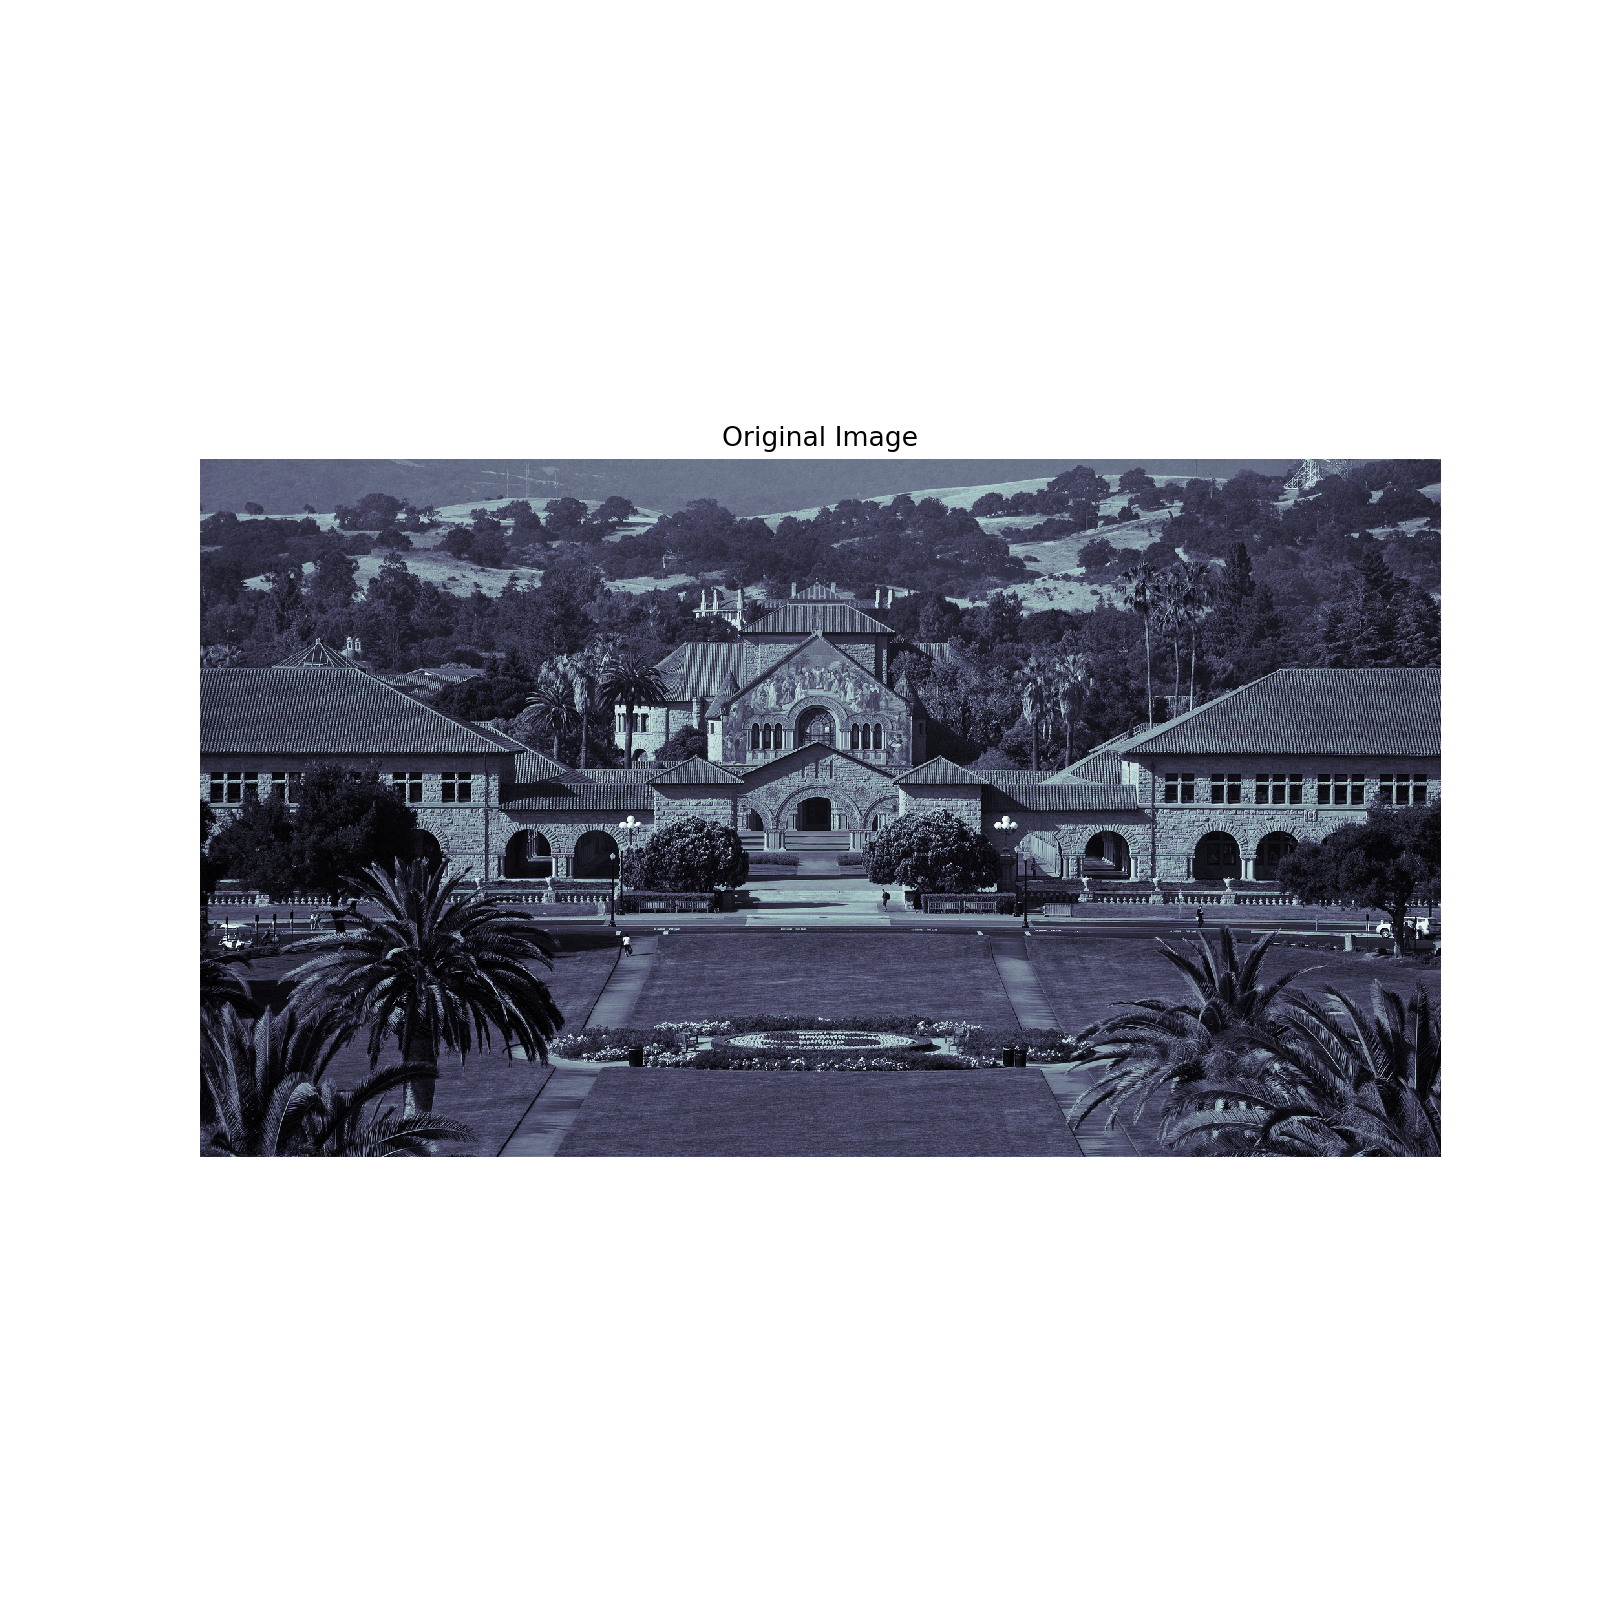

<IPython.core.display.Javascript object>


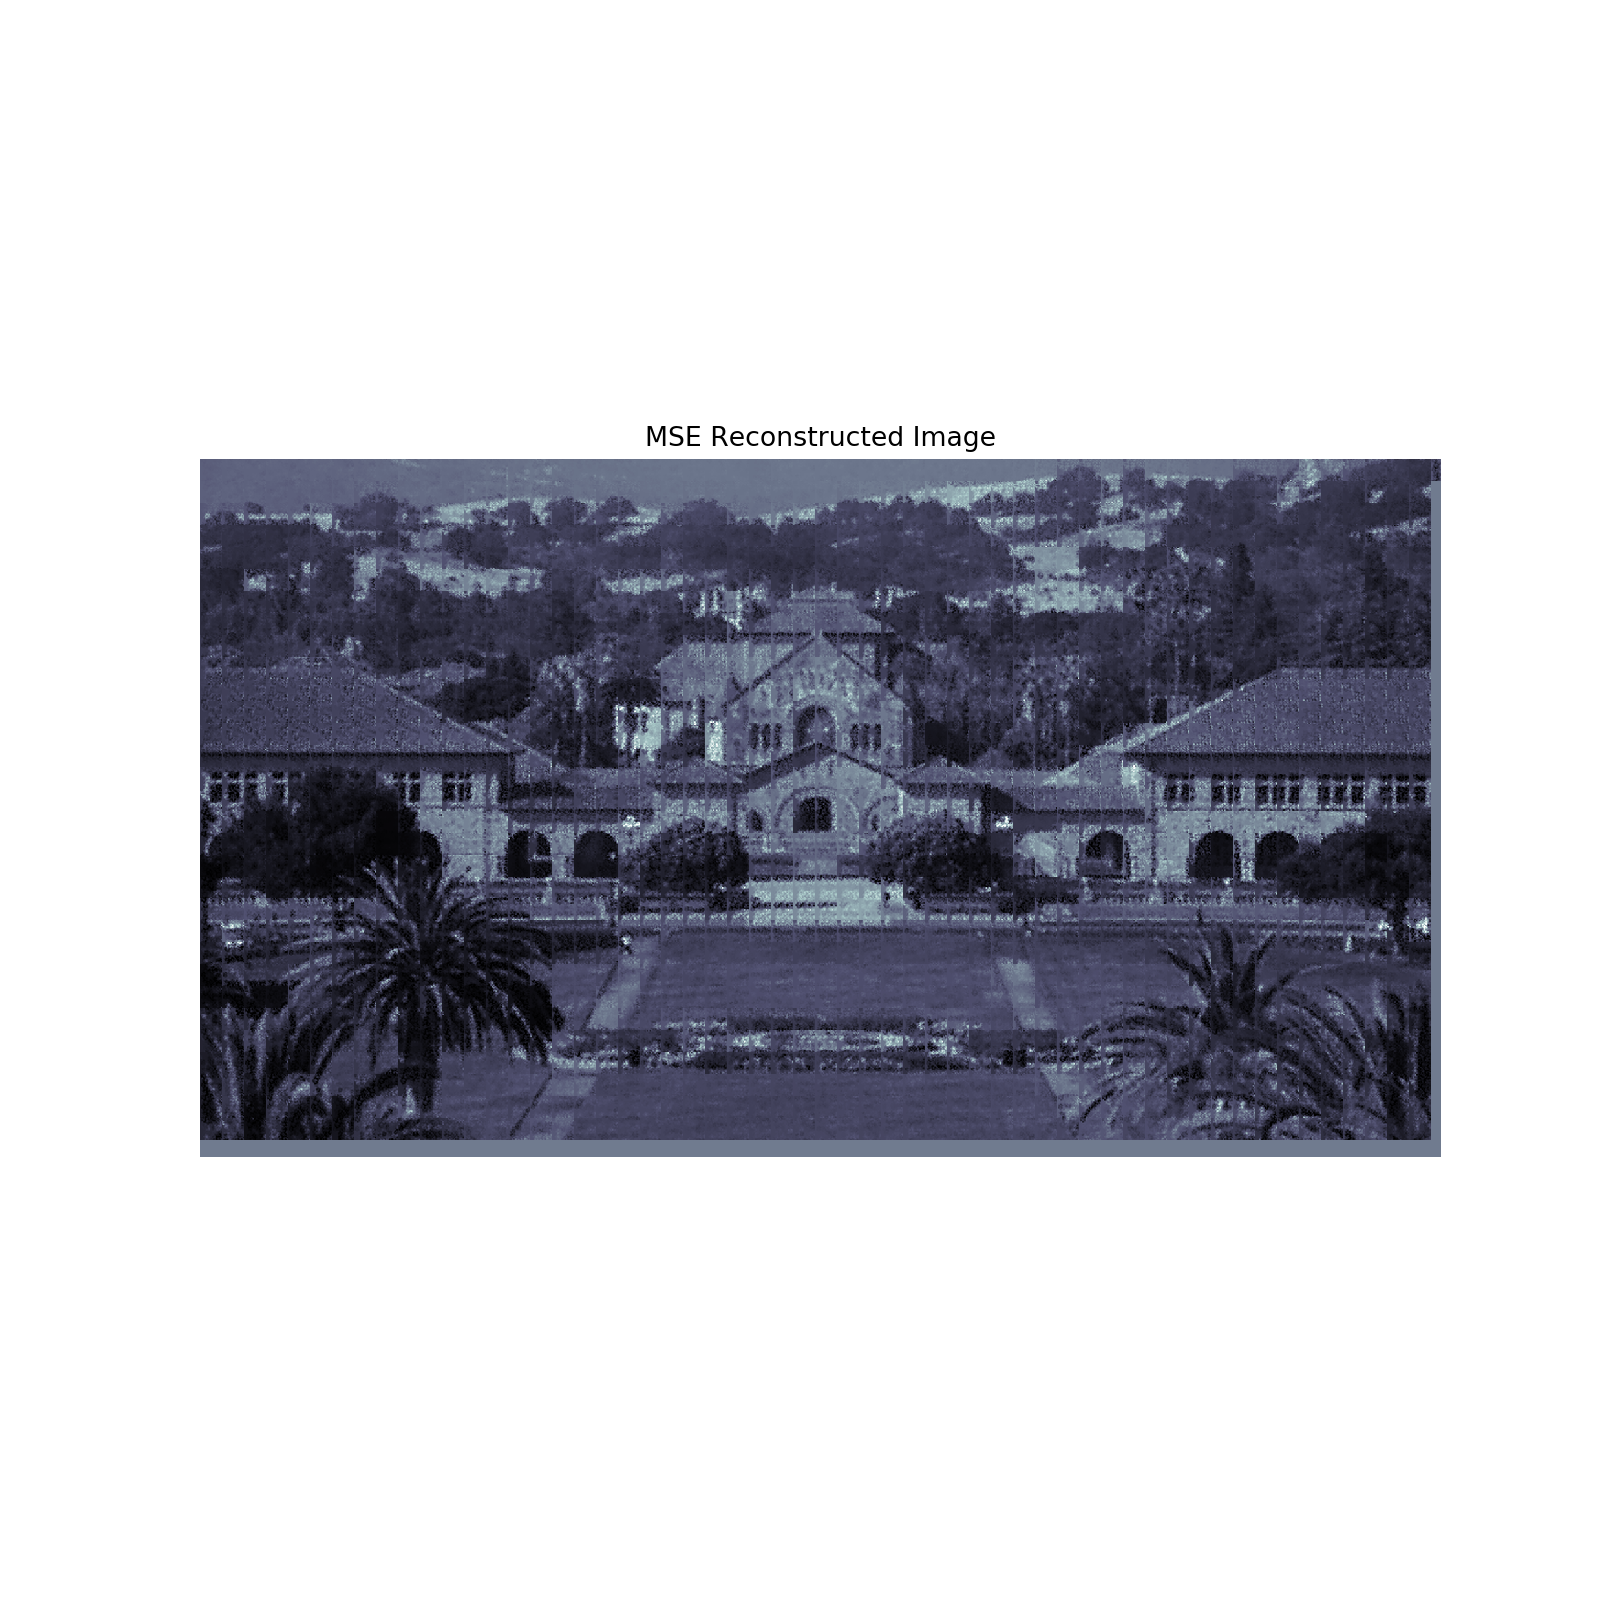

<IPython.core.display.Javascript object>


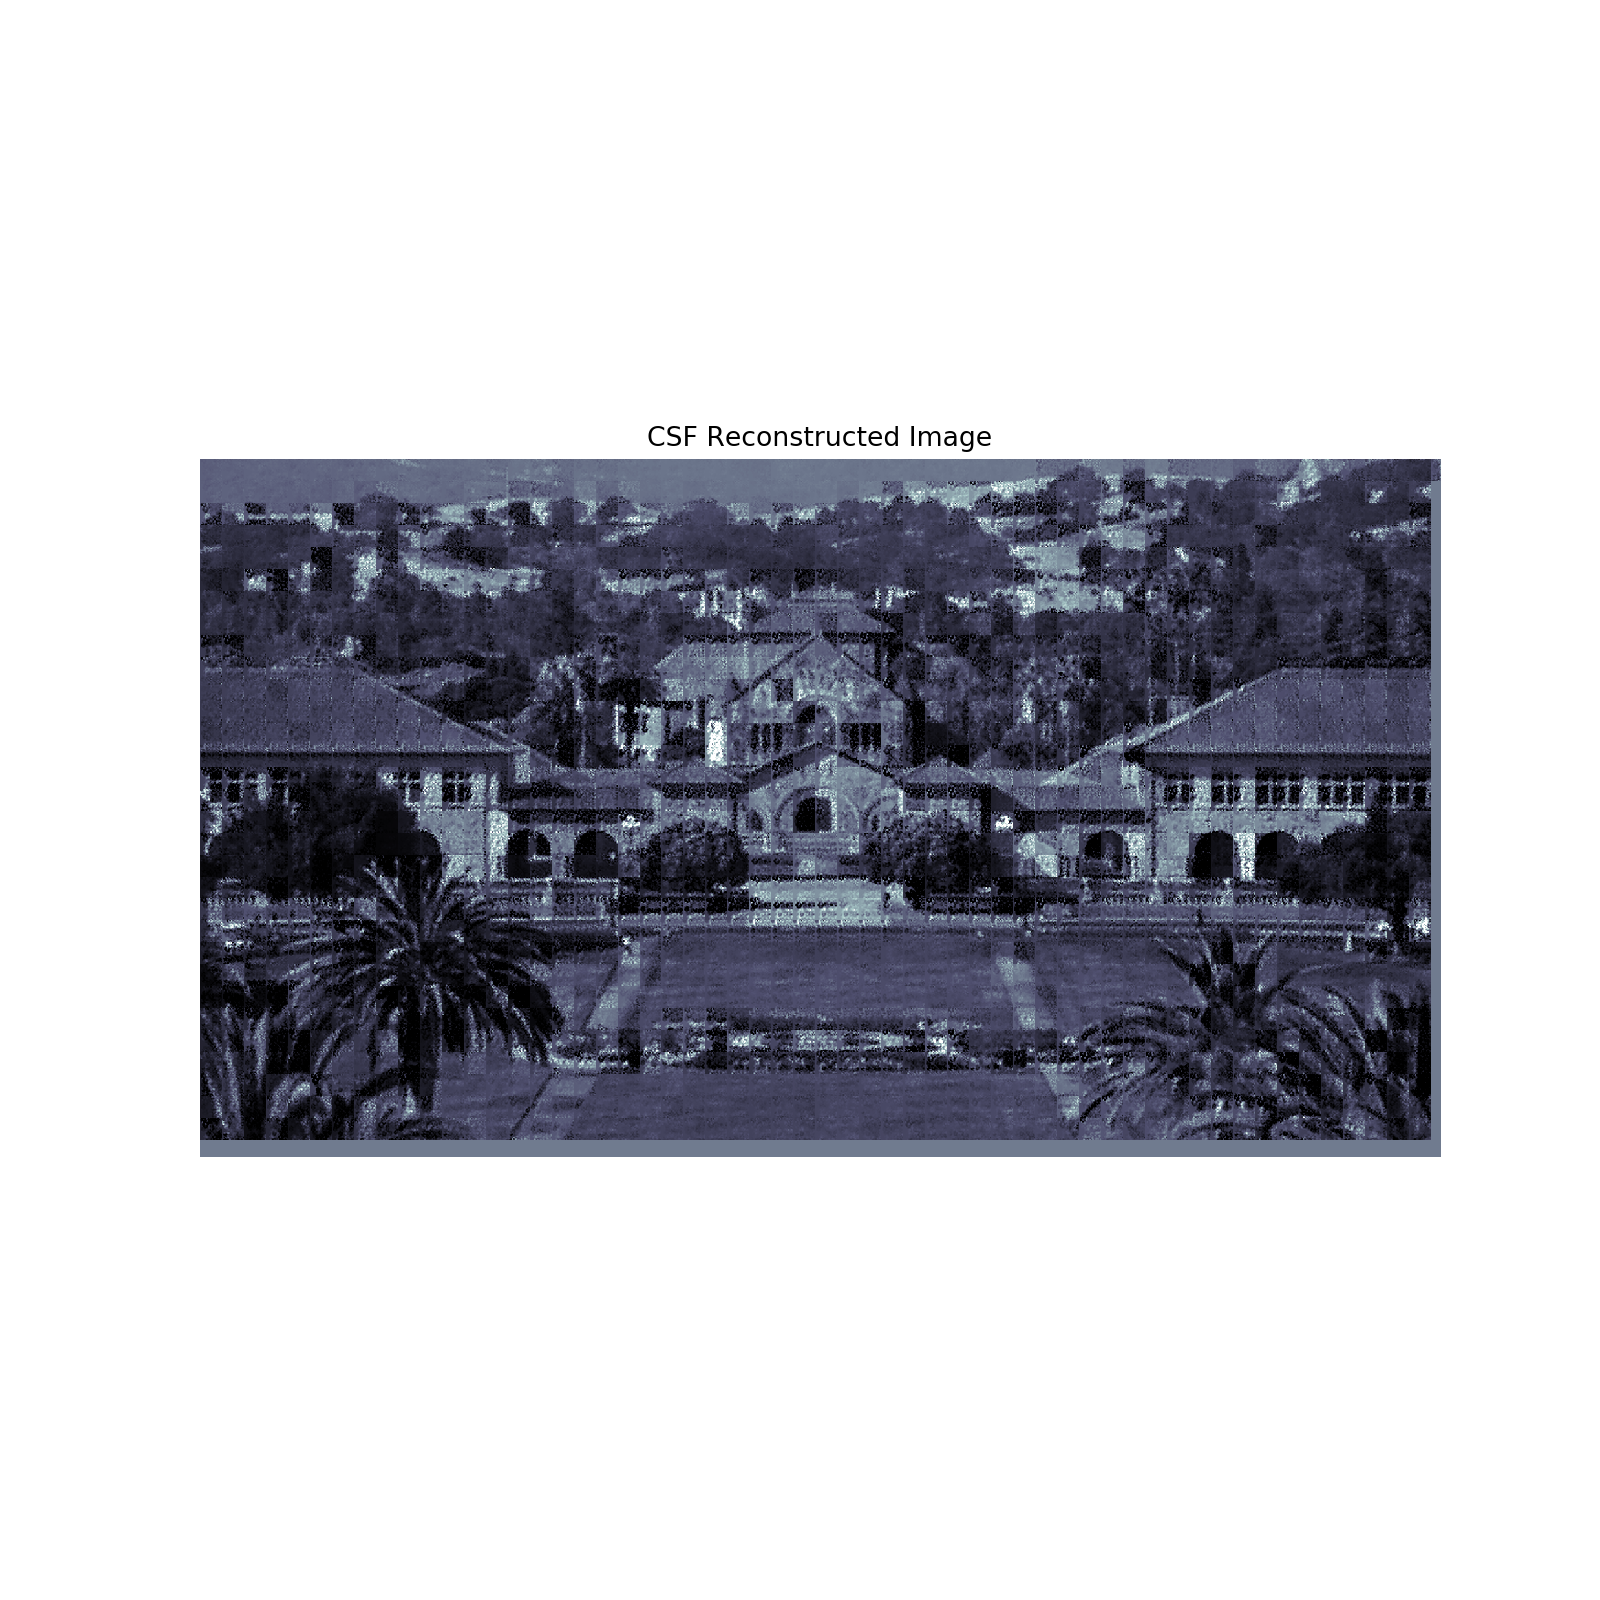

<IPython.core.display.Javascript object>


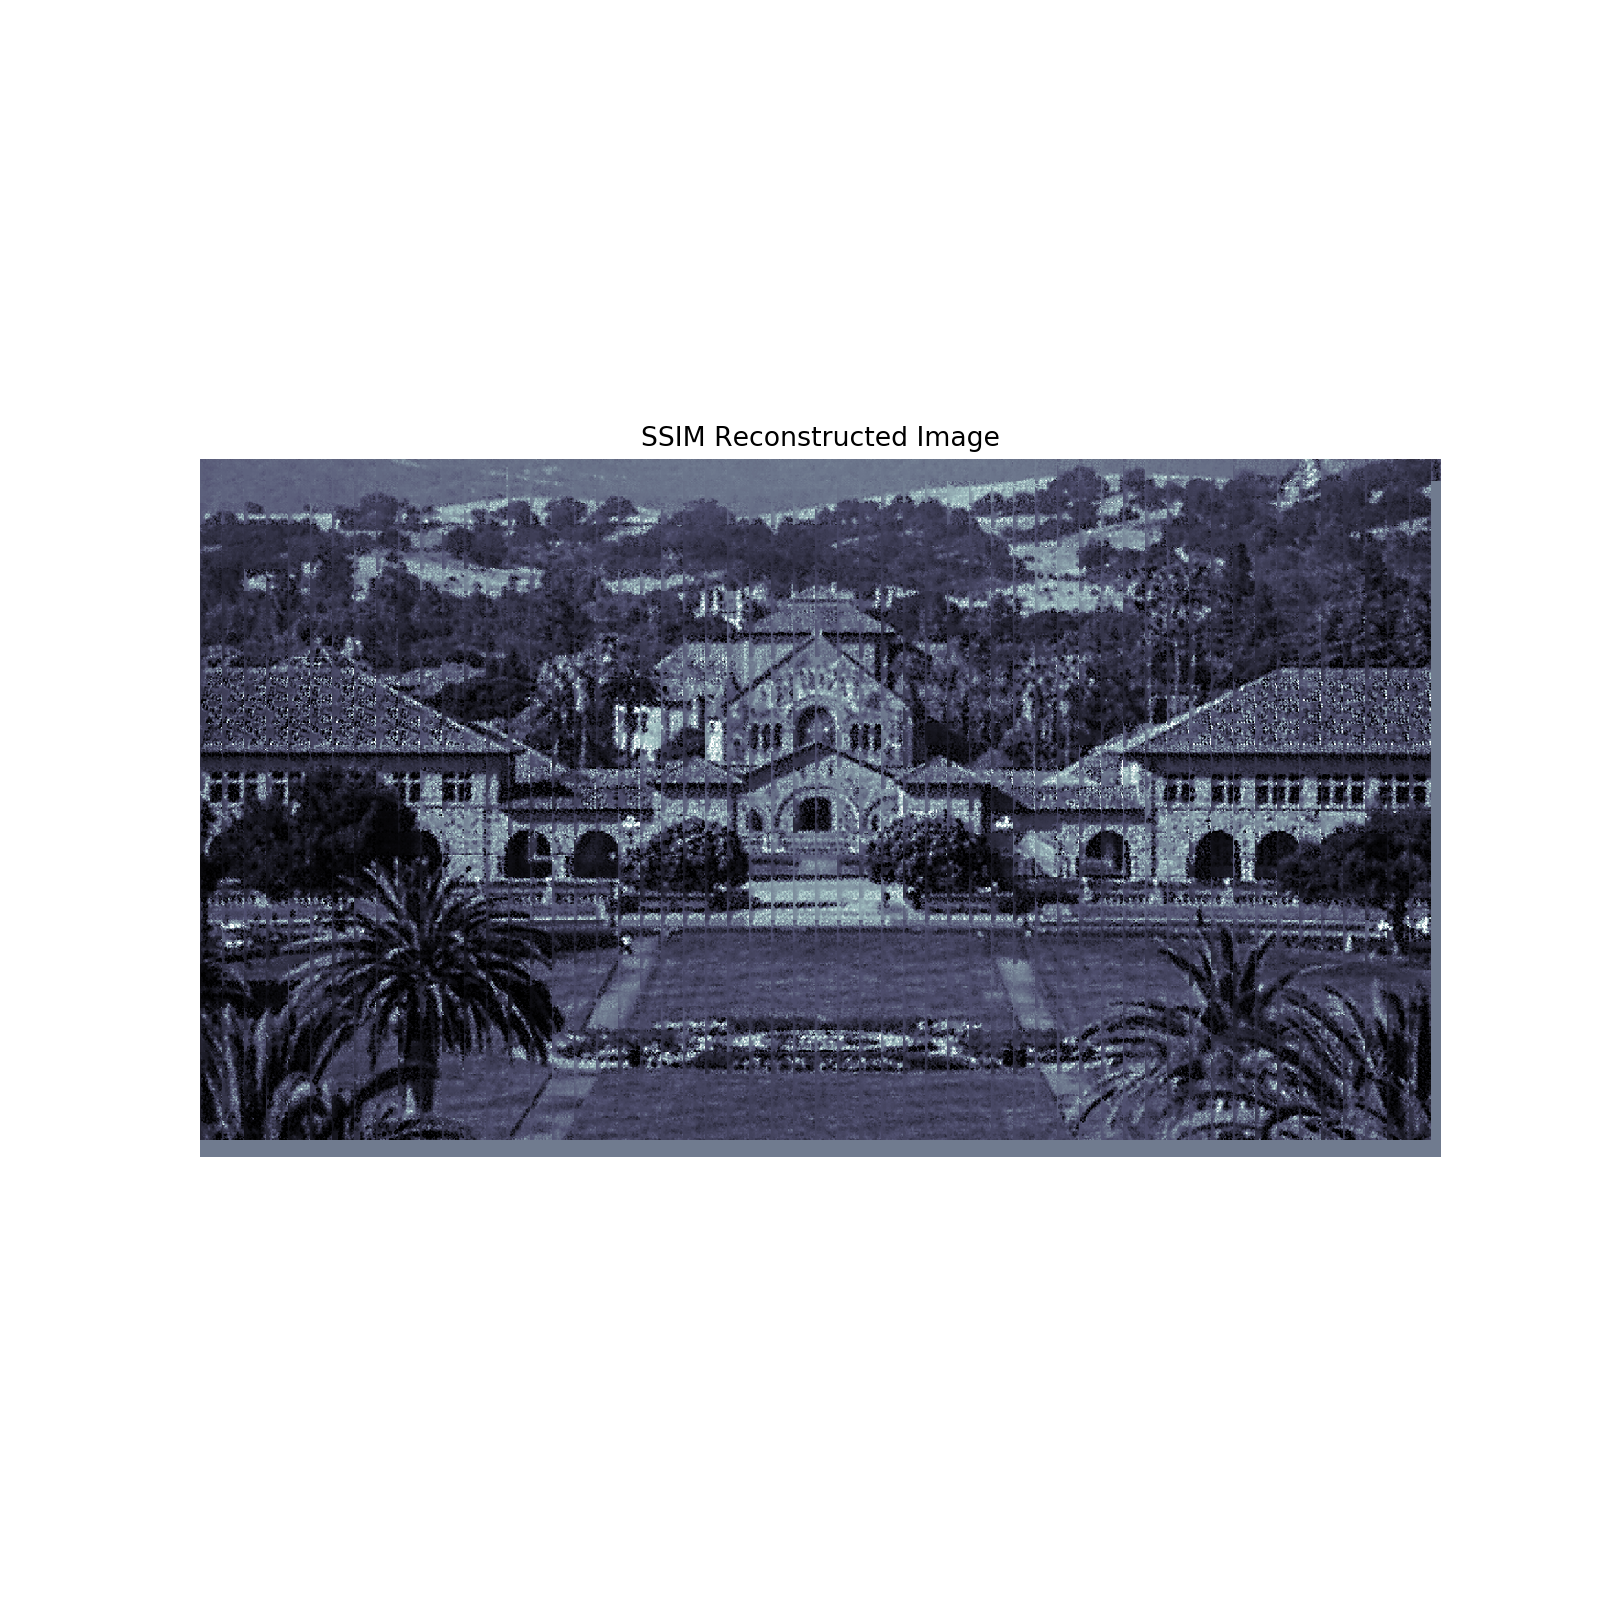

In [34]:
Tidx = 15

mseRec = np.reshape(stimSweepData.mseRecSet[Tidx,:,:],img.shape,order='F')
wmsRec = np.reshape(stimSweepData.wmsRecSet[Tidx,:,:],img.shape,order='F')
ssmRec = np.reshape(stimSweepData.ssmRecSet[Tidx,:,:],img.shape,order='F')


reconsImgCompar(img,mseRec,wmsRec,ssmRec,False)

In [15]:
cp.installed_solvers()



['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'GUROBI', 'OSQP', 'SCS']

SyntaxError: invalid syntax (<ipython-input-13-f324ff6fc7a9>, line 1)